In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [25]:
# Load the dataset
df = pd.read_csv('IMDB dataset.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [27]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [28]:
# Preprocess the data
max_words = 10000
maxlen = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['review'])

sequences = tokenizer.texts_to_sequences(df['review'])

X = pad_sequences(sequences, maxlen=maxlen)
y = (df['sentiment'] == 'positive').astype(int)


In [29]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Build the model
model = Sequential()
model.add(Embedding(max_words, 32, input_length=maxlen))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
250/250 [==============================] - 78s 296ms/step - loss: 0.4382 - accuracy: 0.7836 - val_loss: 0.3706 - val_accuracy: 0.8420
Epoch 2/5
250/250 [==============================] - 69s 276ms/step - loss: 0.2745 - accuracy: 0.8882 - val_loss: 0.3191 - val_accuracy: 0.8604
Epoch 3/5
250/250 [==============================] - 101s 404ms/step - loss: 0.2288 - accuracy: 0.9098 - val_loss: 0.3453 - val_accuracy: 0.8510
Epoch 4/5
250/250 [==============================] - 128s 512ms/step - loss: 0.1958 - accuracy: 0.9250 - val_loss: 0.3726 - val_accuracy: 0.8541
Epoch 5/5
250/250 [==============================] - 131s 523ms/step - loss: 0.1664 - accuracy: 0.9370 - val_loss: 0.4052 - val_accuracy: 0.8500


In [33]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')


313/313 [==============================] - 15s 49ms/step - loss: 0.3988 - accuracy: 0.8539
Test loss: 0.3987881541252136, Test accuracy: 0.8539000153541565


In [34]:
# Confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 17s 49ms/step

Confusion Matrix:
[[4124  837]
 [ 624 4415]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4961
           1       0.84      0.88      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



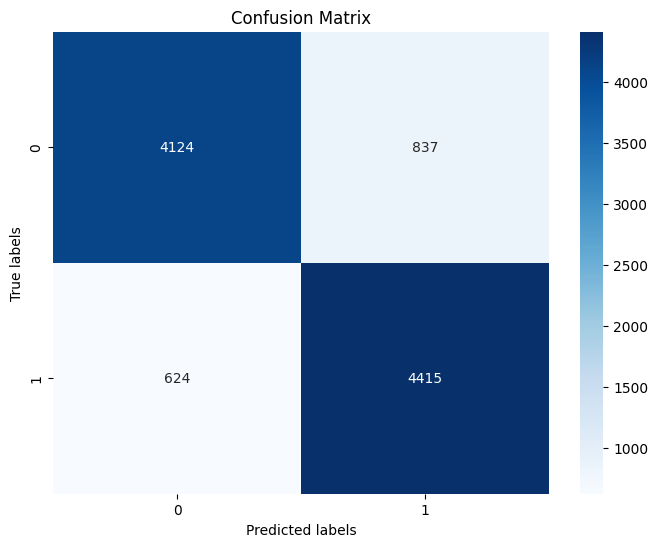

In [35]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [2]:
# Precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall,_  = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

NameError: name 'y_test' is not defined

In [ ]:
# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:


# Make predictions
predictions = model.predict(X_test[:5])
for i in range(5):
    sentiment = 'positive' if predictions[i] > 0.5 else 'negative'
    print( {df["review"][i]})
    print( {sentiment})
    print()
